In [55]:
import pandas as pd
import seaborn as sns
import datetime
import time
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
import numpy as np
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [56]:
df = pd.read_csv(r'/Users/xuzhejia/Desktop/商務數據/cmc_2.csv')

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [57]:
df

,year,month,day,brand,origin,type2,type3,type4,number,oil,...,gdp,income average,covid,industry,signal,lead,unemployement,unem,stock,return
0,2012,1,1,ABARTH,進口,轎車,ECOI,695 TRIBUTO FERRARI,1,110.63,...,3573234.0,133393.0,0.0,78.08,13.0,89.4,4.18,10808.0,7517.08,0.062923
1,2012,1,1,ASTON MARTIN,進口,轎車,SPORTS CAR,VANTAGE,1,110.63,...,3573234.0,133393.0,0.0,78.08,13.0,89.4,4.18,10808.0,7517.08,0.062923
2,2012,1,1,AUDI,進口,轎車,UP-MEDIUM,A4 2.0,8,110.63,...,3573234.0,133393.0,0.0,78.08,13.0,89.4,4.18,10808.0,7517.08,0.062923
3,2012,1,1,AUDI,進口,轎車,UP-MEDIUM,A4 2.0T QUATTRO,1,110.63,...,3573234.0,133393.0,0.0,78.08,13.0,89.4,4.18,10808.0,7517.08,0.062923
4,2012,1,1,AUDI,進口,轎車,UP-MEDIUM,A6 2.0,8,110.63,...,3573234.0,133393.0,0.0,78.08,13.0,89.4,4.18,10808.0,7517.08,0.062923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176985,2022,3,6,VW,進口,RV車,SU,KOMBI 2.0,10,114.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17693.47,0.002339
176986,2022,3,6,VW,進口,RV車,SU,MULTIVAN 2.0,4,114.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17693.47,0.002339
176987,2022,3,6,VW,進口,RV車,SU,TOURAN 1.5 TSI,2,114.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17693.47,0.002339
176988,2022,3,6,東風小康,國產,商車,小,大穩發鐵床,16,114.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17693.47,0.002339


In [58]:
group = df.groupby(['year','month','type2'])
group_year = []
group_month = []
group_sum = []
group_oil = []
group_steel = []
group_CPI = []
group_CPIT = []
group_economicgrowth = []
group_gdp = []
group_incomeaverage = []
group_covid = []
group_industry = []
group_stock = []
group_type = []
for x,y in group:
    group_year.append(list(group.get_group(x)['year'])[0])
    group_month.append(list(group.get_group(x)['month'])[0])
    group_sum.append(group.get_group(x)['number'].sum())
    group_oil.append(list(group.get_group(x)['oil'])[0])
    group_steel.append(list(group.get_group(x)['steel'])[0])
    group_CPI.append(list(group.get_group(x)['CPI'])[0])
    group_CPIT.append(list(group.get_group(x)['CPIT'])[0])
    group_economicgrowth.append(list(group.get_group(x)['economicgrowth'])[0])
    group_gdp.append(list(group.get_group(x)['gdp'])[0])
    group_incomeaverage.append(list(group.get_group(x)['income average'])[0])
    group_covid.append(list(group.get_group(x)['covid'])[0])
    group_industry.append(list(group.get_group(x)['industry'])[0])
    group_stock.append(list(group.get_group(x)['stock'])[0])
    group_type.append(list(group.get_group(x)['type2'])[0])

In [59]:
df_groupby = pd.DataFrame([group_year,group_month,group_sum,group_oil,group_steel,group_CPI,group_CPIT,group_economicgrowth,group_gdp,group_incomeaverage,
group_covid,group_industry,group_stock,group_type]).T
df_groupby.columns = ['year','month','sum','oil','steel','CPI','CPIT','economicgrowth','gdp','incomeaverage','covid','industry','stock','type']

In [60]:
df_groupby

,year,month,sum,oil,steel,CPI,CPIT,economicgrowth,gdp,incomeaverage,covid,industry,stock,type
0,2012,1,13475,110.63,24000,96.37,106.78,1.09,3573234.0,133393.0,0.0,78.08,7517.08,RV車
1,2012,1,3050,110.63,24000,96.37,106.78,1.09,3573234.0,133393.0,0.0,78.08,7517.08,商車
2,2012,1,23609,110.63,24000,96.37,106.78,1.09,3573234.0,133393.0,0.0,78.08,7517.08,轎車
3,2012,2,7692,122.68,24000,95.09,106.86,1.09,3573234.0,133393.0,0.0,84.12,8121.44,RV車
4,2012,2,2155,122.68,24000,95.09,106.86,1.09,3573234.0,133393.0,0.0,84.12,8121.44,商車
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,2022,2,3025,103.07,"29,979",106.02,107.96,3.06,NaN,NaN,NaN,NaN,17652.18,商車
365,2022,2,7073,103.07,"29,979",106.02,107.96,3.06,NaN,NaN,NaN,NaN,17652.18,轎車
366,2022,3,21228,114.87,"29,979",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17693.47,RV車
367,2022,3,4778,114.87,"29,979",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17693.47,商車


In [61]:
df_groupby['year'] = df_groupby['year'].astype(str)
df_groupby['month'] = df_groupby['month'].astype(str)
df_groupby['year'] = df_groupby['year'].apply(lambda x:x.replace('.0',""))
df_groupby['month'] = df_groupby['month'].apply(lambda x:x.replace('.0',""))

In [62]:
df_groupby['date'] = df_groupby['year'] +'/' + df_groupby['month']
df_groupby

,year,month,sum,oil,steel,CPI,CPIT,economicgrowth,gdp,incomeaverage,covid,industry,stock,type,date
0,2012,1,13475,110.63,24000,96.37,106.78,1.09,3573234.0,133393.0,0.0,78.08,7517.08,RV車,2012/1
1,2012,1,3050,110.63,24000,96.37,106.78,1.09,3573234.0,133393.0,0.0,78.08,7517.08,商車,2012/1
2,2012,1,23609,110.63,24000,96.37,106.78,1.09,3573234.0,133393.0,0.0,78.08,7517.08,轎車,2012/1
3,2012,2,7692,122.68,24000,95.09,106.86,1.09,3573234.0,133393.0,0.0,84.12,8121.44,RV車,2012/2
4,2012,2,2155,122.68,24000,95.09,106.86,1.09,3573234.0,133393.0,0.0,84.12,8121.44,商車,2012/2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,2022,2,3025,103.07,"29,979",106.02,107.96,3.06,NaN,NaN,NaN,NaN,17652.18,商車,2022/2
365,2022,2,7073,103.07,"29,979",106.02,107.96,3.06,NaN,NaN,NaN,NaN,17652.18,轎車,2022/2
366,2022,3,21228,114.87,"29,979",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17693.47,RV車,2022/3
367,2022,3,4778,114.87,"29,979",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17693.47,商車,2022/3


In [63]:
df_groupby.set_index(pd.to_datetime(df_groupby['date'],format = '%Y/%m'),inplace = True)
df_groupby

,year,month,sum,oil,steel,CPI,CPIT,economicgrowth,gdp,incomeaverage,covid,industry,stock,type,date
date,,,,,,,,,,,,,,,
2012-01-01,2012,1,13475,110.63,24000,96.37,106.78,1.09,3573234.0,133393.0,0.0,78.08,7517.08,RV車,2012/1
2012-01-01,2012,1,3050,110.63,24000,96.37,106.78,1.09,3573234.0,133393.0,0.0,78.08,7517.08,商車,2012/1
2012-01-01,2012,1,23609,110.63,24000,96.37,106.78,1.09,3573234.0,133393.0,0.0,78.08,7517.08,轎車,2012/1
2012-02-01,2012,2,7692,122.68,24000,95.09,106.86,1.09,3573234.0,133393.0,0.0,84.12,8121.44,RV車,2012/2
2012-02-01,2012,2,2155,122.68,24000,95.09,106.86,1.09,3573234.0,133393.0,0.0,84.12,8121.44,商車,2012/2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,2022,2,3025,103.07,"29,979",106.02,107.96,3.06,NaN,NaN,NaN,NaN,17652.18,商車,2022/2
2022-02-01,2022,2,7073,103.07,"29,979",106.02,107.96,3.06,NaN,NaN,NaN,NaN,17652.18,轎車,2022/2
2022-03-01,2022,3,21228,114.87,"29,979",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17693.47,RV車,2022/3


In [64]:
df_groupby['steel'] = df_groupby['steel'].astype(str).apply(lambda x:x.replace(",",'')).astype(float)

In [65]:
#標準化
sc = StandardScaler()
df_groupby['oil_sc'] = sc.fit_transform(df_groupby['oil'].values.reshape(-1,1))
df_groupby['steel_sc'] = sc.fit_transform(df_groupby['steel'].values.reshape(-1,1))
df_groupby['CPI_sc'] = sc.fit_transform(df_groupby['CPI'].values.reshape(-1,1))
df_groupby['CPIT_sc'] = sc.fit_transform(df_groupby['CPIT'].values.reshape(-1,1))
df_groupby['economicgrowth_sc'] = sc.fit_transform(df_groupby['CPIT'].values.reshape(-1,1))
df_groupby['gdp_sc'] = sc.fit_transform(df_groupby['gdp'].values.reshape(-1,1))
df_groupby['incomeaverage_sc'] = sc.fit_transform(df_groupby['incomeaverage'].values.reshape(-1,1))
df_groupby['covid_sc'] = sc.fit_transform(df_groupby['covid'].values.reshape(-1,1))
df_groupby['industry_sc'] = sc.fit_transform(df_groupby['industry'].values.reshape(-1,1))
df_groupby['stock_sc'] = sc.fit_transform(df_groupby['stock'].values.reshape(-1,1))

In [66]:
df_groupby = df_groupby.loc['2012-01-01':'2020-12-01',:]

In [67]:
df_groupby_RV車 =  df_groupby[df_groupby['type'] == 'RV車']
df_groupby_商車 = df_groupby[df_groupby['type'] == '商車']
df_groupby_轎車 = df_groupby[df_groupby['type'] == '轎車']

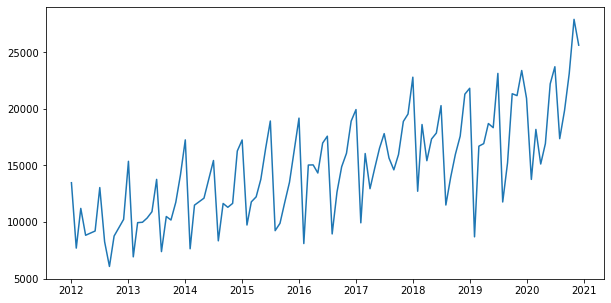

In [68]:
plt.plot(df_groupby_RV車.index,df_groupby_RV車['sum'])

In [71]:
df_groupby_RV車 

,year,month,sum,oil,steel,CPI,CPIT,economicgrowth,gdp,incomeaverage,...,oil_sc,steel_sc,CPI_sc,CPIT_sc,economicgrowth_sc,gdp_sc,incomeaverage_sc,covid_sc,industry_sc,stock_sc
date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,2012,1,13475,110.63,24000.0,96.37,106.78,1.09,3573234.0,133393.0,...,1.457634,0.456439,-1.683748,0.839316,0.839316,7.681146,-1.597193,-0.159479,-1.984686,-1.051538
2012-02-01,2012,2,7692,122.68,24000.0,95.09,106.86,1.09,3573234.0,133393.0,...,1.919145,0.456439,-2.205587,0.861752,0.861752,7.681146,-1.597193,-0.159479,-1.544733,-0.839523
2012-03-01,2012,3,11203,123.15,24000.0,95.09,106.86,1.09,0.59,133393.0,...,1.937146,0.456439,-2.205587,0.861752,0.861752,-0.130197,-1.597193,-0.159479,-0.783555,-0.905629
2012-04-01,2012,4,8827,119.04,24500.0,96.09,109.17,1.04,2.6,130318.0,...,1.779734,0.628721,-1.797900,1.509565,1.509565,-0.130193,-1.758702,-0.159479,-1.010088,-1.056926
2012-05-01,2012,5,9013,101.75,24500.0,96.57,108.16,1.04,2.6,130318.0,...,1.117532,0.628721,-1.602210,1.226322,1.226322,-0.130193,-1.758702,-0.159479,-0.787197,-1.127165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,2020,8,17369,45.39,22179.0,102.5,98.9,4.31,6.43,187616.0,...,-1.041039,-0.171013,0.815374,-1.370541,-1.370541,-0.130184,1.250774,-0.140315,1.089888,0.728593
2020-09-01,2020,9,19862,40.29,22179.0,102.4,98.34,4.31,6.43,187616.0,...,-1.236367,-0.171013,0.774605,-1.527587,-1.527587,-0.130184,1.250774,-0.129041,1.346285,0.701988
2020-10-01,2020,10,23119,36.29,22979.0,102.75,99.1,5.3,7.35,196315.0,...,-1.389566,0.104638,0.917296,-1.314453,-1.314453,-0.130182,1.707673,-0.111004,1.162728,0.712768


In [72]:
adfuller(df_groupby_RV車['sum'].diff()[1:]) #一街差分定太

(-4.866366744321893,
 4.053082560641281e-05,
 11,
 95,
 {'1%': -3.5011373281819504,
  '5%': -2.8924800524857854,
  '10%': -2.5832749307479226},
 1684.7986745355322)

In [73]:
df_model_RV車 = df_groupby_RV車.loc[:,['sum','oil_sc','steel_sc','CPI_sc','CPIT_sc','economicgrowth_sc','gdp_sc',
'incomeaverage_sc','covid_sc','industry_sc','stock_sc']]

In [74]:
df_model_RV車['oil_sc_last_month'] = df_model_RV車['oil_sc'].shift()
df_model_RV車['steel_sc_last_month'] = df_model_RV車['steel_sc'].shift()
df_model_RV車['CPI_sc_last_month'] = df_model_RV車['CPI_sc'].shift()
df_model_RV車['economicgrowth_sc_last_month'] = df_model_RV車['economicgrowth_sc'].shift()
df_model_RV車['gdp_sc_last_month'] = df_model_RV車['gdp_sc'].shift()
df_model_RV車['incomeaverage_sc_last_month'] = df_model_RV車['incomeaverage_sc'].shift()
df_model_RV車['covid_sc_last_month'] = df_model_RV車['covid_sc'].shift()
df_model_RV車['industry_sc_last_month'] = df_model_RV車['industry_sc'].shift()
df_model_RV車['stock_sc_last_month'] = df_model_RV車['stock_sc'].shift()
df_model_RV車['CPIT_sc_last_month'] = df_model_RV車['CPIT_sc'].shift()
df_model_RV車['last_sell'] = df_model_RV車['sum'].shift()

In [76]:
#將第一列的空值排除
df_model_RV車 = df_model_RV車.iloc[1:,:]

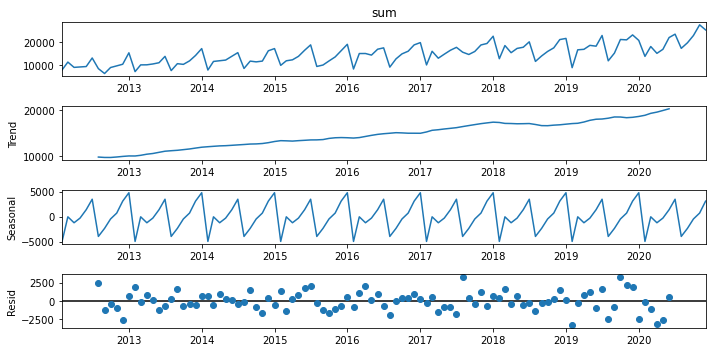

<Figure size 2880x720 with 0 Axes>

In [77]:
result = seasonal_decompose(df_model_RV車['sum'],model='additive', period=12)
rcParams['figure.figsize'] = 10, 5
result.plot()
plt.figure(figsize=(40,10))
plt.show()

In [79]:
#build model
auto_arima(df_groupby_RV車['sum'].diff()[1:],seasonal=True,m = 12).summary() #12

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  107
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -849.343
Date:                            Fri, 13 May 2022   AIC                           1704.687
Time:                                    21:28:17   BIC                           1712.349
Sample:                                         0   HQIC                          1707.783
                                            - 107                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7501      0.071    -10.589      0.000      -0.889      -0.611
ma.S.L12      -0.5190      0.100     -5.173      0.000      -0.716      -0.322
sigma2      3.313e+06   4.68e+05      7.081      0.000     2.4e+06    4.23e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                 0.56
Prob(Q):                              0.54   Prob(JB):                         0.75
Heteroskedasticity (H):               2.07   Skew:                             0.15
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [166]:
ans_ans = []
for x in range(70,len(df_model_RV車.index)-1):  #4
    s = SARIMAX(
                df_model_RV車.loc[:df_model_RV車.index[x],'sum'].astype(int).values,
                order = (0,0,1),
                seasonal_order=(0,1,1,12),
                exog = df_model_RV車.loc[:df_model_RV車.index[x],[                                   
                                    'last_sell',
                                    'incomeaverage_sc_last_month',
                                    'stock_sc_last_month', 
                                    'CPI_sc_last_month',
                                    'industry_sc_last_month']].astype(float),
                trend = 'n',
                time_varying_regression=False,
                mle_regression=False,
                measurement_error = True,
                enforce_stationary = False
            )
    result = s.fit()
    ans = result.get_forecast(steps = 1, exog = df_model_RV車.loc[df_model_RV車.index[x+1],[
                                 'last_sell',
                                 'incomeaverage_sc_last_month',
                                 'stock_sc_last_month',
                                 'CPI_sc_last_month',
                                 'industry_sc_last_month']].astype(float))
    ans_ans.append(ans.predicted_mean.values[0])


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.82715D+00    |proj g|=  1.97804D-01

At iterate    5    f=  6.77270D+00    |proj g|=  1.69190D-02

At iterate   10    f=  6.77061D+00    |proj g|=  8.79806D-04
  ys=-1.219E-06  -gs= 5.796E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     57      1     1     0   5.940D-02   6.771D+00
  F =   6.7705479084267060     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  


At iterate   10    f=  6.79187D+00    |proj g|=  2.62499D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     89      2     0     0   5.804D-02   6.792D+00
  F =   6.7918660601397667     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.86648D+00    |proj g|=  1.76668D-01

At iterate    5    f=  6.81859D+00    |proj g|=  8.57308D-05

At iterate   10    f=  6.81858D+00    |proj g|=  5.02212D-04

At iter

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f=  6.83996D+00    |proj g|=  8.59021D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     36      1     0     0   2.077D-02   6.840D+00
  F =   6.8399608329960770     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.89173D+00    |proj g|=  1.39675D-01

At iterate    5    f=  6.85929D+00    |proj g|=  2.49156D-03

At iterate   10    f=  6.85904D+00    |proj g|=  4.41746D-03

At iterate   15    f=  6.85431D+00    |proj g|=  1.07199D-02

At iterate   20    f=  6.85292D+00    |proj g|=  1.35988D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     28      1     0     0   1.008D-05   6.853D+00
  F =   6.8529197976497489     

CONVERG

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.91577D+00    |proj g|=  1.48889D-01

At iterate    5    f=  6.87972D+00    |proj g|=  3.44097D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     19      1     0     0   5.091D-02   6.880D+00
  F =   6.8797081098906796     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   10    f=  6.91468D+00    |proj g|=  3.88000D-04

At iterate   15    f=  6.91467D+00    |proj g|=  1.70388D-03

At iterate   20    f=  6.91315D+00    |proj g|=  1.42538D-02

At iterate   25    f=  6.90574D+00    |proj g|=  4.09683D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   30    f=  6.90566D+00    |proj g|=  2.30372D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     87      2     0     0   2.304D-05   6.906D+00
  F =   6.9056558393495333     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.00150D+00    |proj g|=  1.63234D-01

At iterate    5    f=  6.96403D+00    |proj g|=  9.93764D-04
  ys=-3.935E-07  -gs= 7.896E-08 BFGS update SKIPPED

At iterate   10  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     34      1     0     0   1.948D-02   6.981D+00
  F =   6.9810044497331560     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.01744D+00    |proj g|=  1.02854D-01

At iterate    5    f=  6.99651D+00    |proj g|=  1.99987D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/si

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.02982D+00    |proj g|=  7.88021D-02

At iterate    5    f=  7.01539D+00    |proj g|=  2.51828D-03

At iterate   10    f=  7.01480D+00    |proj g|=  3.46635D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     35      1     0     0   3.466D-02   7.015D+00
  F =   7.0148045352995503     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.05618D+00    |proj g|=  7.25488D-02

At iterate    5    f=  7.03963D+00    |proj g|=  4.13847D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     41      1     0     0   9.474D-02   7.040D+00
  F =   7.0396201836364645     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.06546D+00    |proj g|=  4.74851D-02

At iterate    5    f=  7.05405D+00    |proj g|=  2.80179D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     62      1     0     0   4.722D-02   7.054D+00
  F =   7.0540479965192500     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.09620D+00    |proj g|=  3.96968D-02

At iterate    5    f=  7.08289D+00    |proj g|=  5.07395D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   10    f=  7.08288D+00    |proj g|=  5.32699D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     90      2     0     0   5.327D-02   7.083D+00
  F =   7.0828778740717375     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.11095D+00    |proj g|=  3.94694D-02

At iterate    5    f=  7.09755D+00    |proj g|=  5.17636D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     64      2     0     0   4.881D-02   7.097D+00
  F =   7.0974857179246316     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.12488D+00    |proj g|=  3.41600D-02

At iterate    5    f=  7.11479D+00    |proj g|=  1.31978D-04

At iterate   10    f=  7.11191D+00    |proj g|=  8.96156D-03

At iterate   15    f=  7.09136D+00    |proj g|=  2.08520D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   20    f=  7.09067D+00    |proj g|=  4.39697D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     67      1     0     0   4.397D-02   7.091D+00
  F =   7.0906654120855164     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.13842D+00    |proj g|=  3.49328D-02

At iterate    5    f=  7.12761D+00    |proj g|=  1.32786D-04

At iterate   10    f=  7.12723D+00    |proj g|=  3.55876D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   20    f=  7.11560D+00    |proj g|=  3.39804D-03

At iterate   25    f=  7.11550D+00    |proj g|=  8.71842D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     37      1     0     0   3.561D-06   7.115D+00
  F =   7.1154589325570949     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.17672D+00    |proj g|=  5.23484D-02


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.16412D+00    |proj g|=  5.21379D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     32      1     0     0   1.330D-03   7.164D+00
  F =   7.1640976521435551     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19684D+00    |proj g|=  5.20844D-02

At iterate    5    f=  7.18191D+00    |proj g|=  4.82887D-02


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     26      1     0     0   4.829D-02   7.182D+00
  F =   7.1819127824151394     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.21244D+00    |proj g|=  6.35926D-02

At iterate    5    f=  7.19571D+00    |proj g|=  3.16849D-03


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     30      1     0     0   5.387D-02   7.196D+00
  F =   7.1957097272876362     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.27508D+00    |proj g|=  8.85978D-02

At iterate    5    f=  7.25090D+00    |proj g|=  1.29611D-02

At iterate   10    f=  7.24964D+00    |proj g|=  1.07635D-04


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   15    f=  7.24922D+00    |proj g|=  4.79505D-03

At iterate   20    f=  7.23571D+00    |proj g|=  1.05748D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     64      1     0     0   6.576D-02   7.235D+00
  F =   7.2350441036198294     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.29205D+00    |proj g|=  1.05270D-01

At iterate    5    f=  7.26216D+00    |proj g|=  3.43435D-03
  ys=-6.009E-09  -gs= 5.139E-08 BFGS update SKIPPED

At iterate   10    f=  7.26210D+00    |proj g|=  4.67939D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     68      1     1     0   4.679D-02   7.262D+00
  F =   7.2620997031036225     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.30311D+00    |proj g|=  1.03073D-01

At iterate    5    f=  7.27681D+00    |proj g|=  3.39742D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     61      2     0     0   4.815D-02   7.277D+00
  F =   7.2768115272285874     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.34366D+00    |proj g|=  1.27050D-01

At iterate    5    f=  7.31411D+00    |proj g|=  3.68453D-03
  ys=-2.162E-08  -gs= 1.918E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of fu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.33797D+00    |proj g|=  9.55871D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     38      1     0     0   3.623D-02   7.338D+00
  F =   7.3379725465117085     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.36953D+00    |proj g|=  9.80374D-02

At iterate    5    f=  7.35272D+00    |proj g|=  2.43941D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     43      1     0     0   7.326D-02   7.352D+00
  F =   7.3524579074725187     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.37841D+00    |proj g|=  9.27374D-02

At iterate    5    f=  7.36241D+00    |proj g|=  1.55759D-03

At iterate   10    f=  7.36229D+00    |proj g|=  7.99460D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/si


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     37      1     0     0   3.664D-02   7.362D+00
  F =   7.3622724819773540     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.38338D+00    |proj g|=  6.41505D-02

At iterate    5    f=  7.37409D+00    |proj g|=  4.78017D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.40782D+00    |proj g|=  2.17186D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     23      1     0     0   2.172D-02   7.408D+00
  F =   7.4078172554982435     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.42374D+00    |proj g|=  3.45768D-02


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.41800D+00    |proj g|=  2.40926D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     24      1     0     0   2.409D-02   7.418D+00
  F =   7.4180037964835481     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.43373D+00    |proj g|=  3.30483D-02

At iterate    5    f=  7.42840D+00    |proj g|=  3.80136D-04

At iterate   10    f=  7.42806D+00    |proj g|=  8.65960D-03


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   15    f=  7.41991D+00    |proj g|=  2.93109D-02

At iterate   20    f=  7.41665D+00    |proj g|=  1.03050D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     37      1     0     0   1.031D-02   7.417D+00
  F =   7.4166506887719823     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.44226D+00    |proj g|=  3.30935D-02


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.43770D+00    |proj g|=  1.00694D-04

At iterate   10    f=  7.43587D+00    |proj g|=  1.59473D-02

At iterate   15    f=  7.43502D+00    |proj g|=  2.52966D-02

At iterate   20    f=  7.42615D+00    |proj g|=  1.06203D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     38      1     0     0   1.062D-04   7.426D+00
  F =   7.4261530210231497     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.45219D+00    |proj g|=  3.15884D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  7.44847D+00    |proj g|=  2.22694D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     37      2     0     0   2.227D-02   7.448D+00
  F =   7.4484671790219075     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49731D+00    |proj g|=  2.95799D-02

At iterate    5    f=  7.49462D+00    |proj g|=  8.48878D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [167]:
df_groupby_RV車

,year,month,sum,oil,steel,CPI,CPIT,economicgrowth,gdp,incomeaverage,...,oil_sc,steel_sc,CPI_sc,CPIT_sc,economicgrowth_sc,gdp_sc,incomeaverage_sc,covid_sc,industry_sc,stock_sc
date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,2012,1,13475,110.63,24000.0,96.37,106.78,1.09,3573234.0,133393.0,...,1.457634,0.456439,-1.683748,0.839316,0.839316,7.681146,-1.597193,-0.159479,-1.984686,-1.051538
2012-02-01,2012,2,7692,122.68,24000.0,95.09,106.86,1.09,3573234.0,133393.0,...,1.919145,0.456439,-2.205587,0.861752,0.861752,7.681146,-1.597193,-0.159479,-1.544733,-0.839523
2012-03-01,2012,3,11203,123.15,24000.0,95.09,106.86,1.09,0.59,133393.0,...,1.937146,0.456439,-2.205587,0.861752,0.861752,-0.130197,-1.597193,-0.159479,-0.783555,-0.905629
2012-04-01,2012,4,8827,119.04,24500.0,96.09,109.17,1.04,2.6,130318.0,...,1.779734,0.628721,-1.797900,1.509565,1.509565,-0.130193,-1.758702,-0.159479,-1.010088,-1.056926
2012-05-01,2012,5,9013,101.75,24500.0,96.57,108.16,1.04,2.6,130318.0,...,1.117532,0.628721,-1.602210,1.226322,1.226322,-0.130193,-1.758702,-0.159479,-0.787197,-1.127165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,2020,8,17369,45.39,22179.0,102.5,98.9,4.31,6.43,187616.0,...,-1.041039,-0.171013,0.815374,-1.370541,-1.370541,-0.130184,1.250774,-0.140315,1.089888,0.728593
2020-09-01,2020,9,19862,40.29,22179.0,102.4,98.34,4.31,6.43,187616.0,...,-1.236367,-0.171013,0.774605,-1.527587,-1.527587,-0.130184,1.250774,-0.129041,1.346285,0.701988
2020-10-01,2020,10,23119,36.29,22979.0,102.75,99.1,5.3,7.35,196315.0,...,-1.389566,0.104638,0.917296,-1.314453,-1.314453,-0.130182,1.707673,-0.111004,1.162728,0.712768


In [168]:
error_percent = np.mean(np.abs(df_model_RV車.loc['2018-01-01 00:00:00':'2020-12-01 00:00:00','sum'] - ans_ans)/df_model_RV車.loc['2018-01-01 00:00:00':'2020-12-01 00:00:00','sum'])

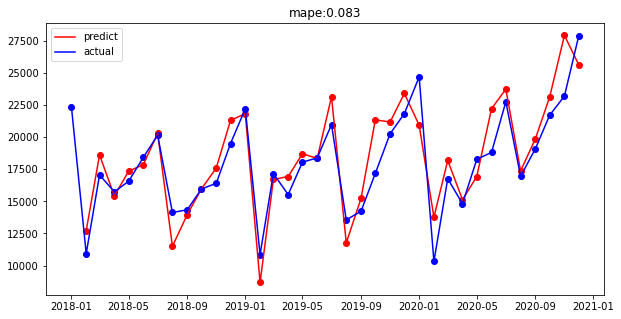

In [169]:
plt.plot(df_model_RV車.loc['2018-02-01':'2020-12-01','sum'].index,df_model_RV車.loc['2018-02-01':'2020-12-01','sum'],color = 'red')
plt.plot(df_model_RV車.index[71:107],ans_ans,color = 'blue') #3
plt.scatter(df_model_RV車.loc['2018-02-01':'2020-12-01','sum'].index,df_model_RV車.loc['2018-02-01':'2020-12-01','sum'], color = 'red')
plt.scatter(df_model_RV車.index[71:107],ans_ans,color = 'blue') #3
plt.legend(['actual','predict'])
plt.title('mape:'+str(error_percent.round(3)))
plt.legend(['predict','actual'])

In [137]:
from sklearn.ensemble import RandomForestRegressor
X = df_model_RV車.iloc[:,11:]
y = df_model_RV車.iloc[:,0]

In [102]:
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)

RandomForestRegressor(n_estimators=500, random_state=1)

In [104]:
a = list(zip(X.columns,model.feature_importances_))
a.sort(key = lambda x:x[1])
a

[('covid_sc_last_month', 0.004719666199874454),
 ('steel_sc_last_month', 0.018968033594737675),
 ('gdp_sc_last_month', 0.03063944431239228),
 ('oil_sc_last_month', 0.03473411240986224),
 ('economicgrowth_sc_last_month', 0.04252302833581757),
 ('CPIT_sc_last_month', 0.045305385655941936),
 ('industry_sc_last_month', 0.048489088252076526),
 ('stock_sc_last_month', 0.13278308201798858),
 ('last_sell', 0.1377874340167684),
 ('CPI_sc_last_month', 0.24767884541998847),
 ('incomeaverage_sc_last_month', 0.25637187978455206)]